In [1]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import sys

In [2]:
current_dir = os.path.dirname(os.getcwd())
sys.path.append(current_dir)

In [3]:
from kilter_holds import KilterHolds

In [4]:
raw_data_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'raw')
holds = KilterHolds(raw_data_dir)

Climb hold colors reset to default
Climb hold type reset to default.
Data loaded and preprocessed successfully.


In [5]:
my_string = 'p1253r12p1269r12p1290r13p1342r13p1375r13p1388r14p1498r15p1508r15p1527r15'
color_map = {
        'r12': 'green',
        'r13': 'blue',
        'r14': 'red',
        'r15': 'yellow'
    }

In [6]:
holds.merged_df

,placement_id,hole_id,layout_id,set_id,x,y,default_role_id,default_hold_color,climb_hold_color,default_hold_type,climb_hold_type,use_frequency
0,1447,1133,1,20,140,4,15.0,gray,gray,unusued,unusued,0
1,1073,1134,1,1,136,8,13.0,black,black,unusued,unusued,0
2,1448,1135,1,20,132,4,15.0,gray,gray,unusued,unusued,0
3,1074,1136,1,1,128,8,13.0,black,black,unusued,unusued,0
4,1449,1137,1,20,124,4,15.0,gray,gray,unusued,unusued,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3768,4841,4422,1,20,148,116,15.0,gray,gray,unusued,unusued,0
3769,4842,4423,1,20,164,116,15.0,gray,gray,unusued,unusued,0
3770,4843,4424,1,20,156,124,15.0,gray,gray,unusued,unusued,0
3771,4844,4425,1,20,148,132,15.0,gray,gray,unusued,unusued,0


In [7]:
holds.apply_custom_colors(my_string, color_map)

Climb hold colors reset to default
Custom colors applied.


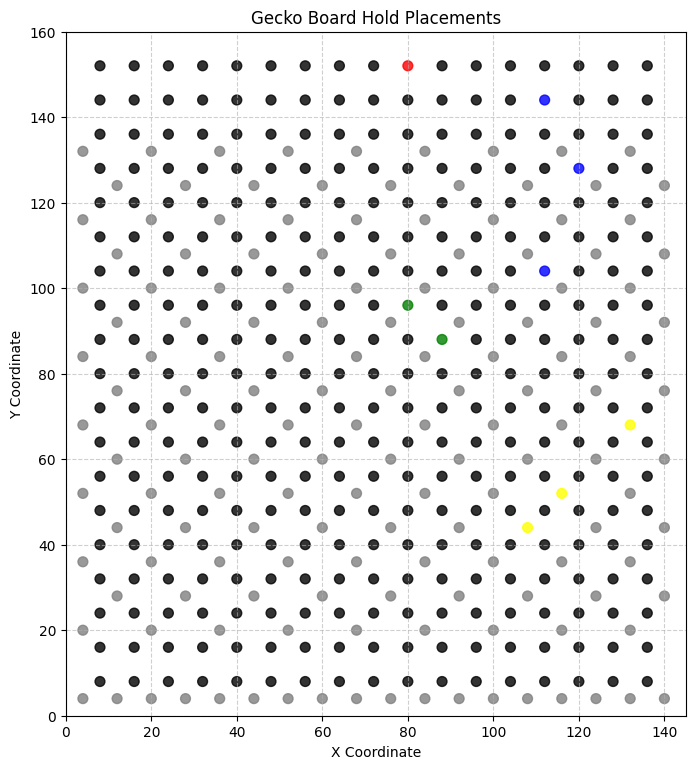

In [8]:
holds.plot_gecko_board()

Climb hold colors reset to default


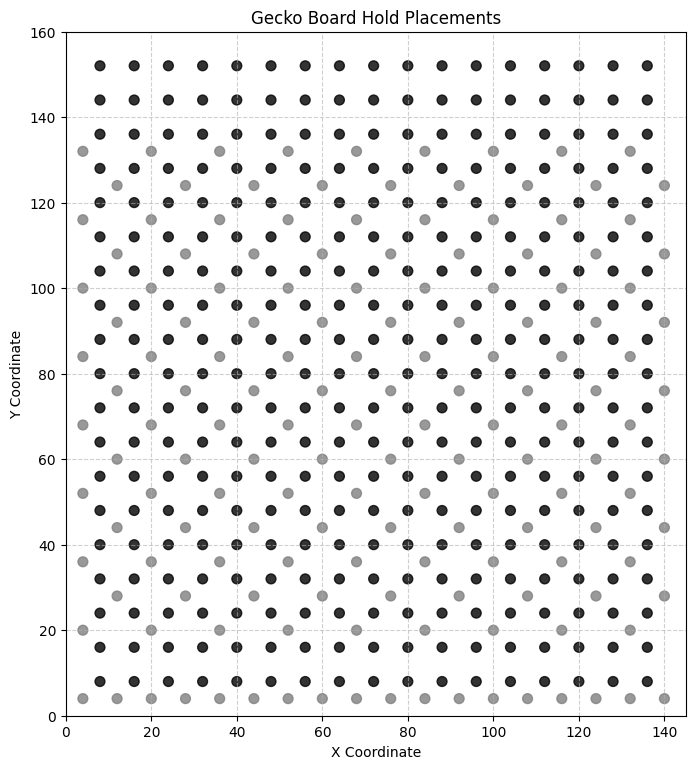

In [9]:
holds._reset_default_colors()
holds.plot_gecko_board()

In [10]:
holds._reset_default_colors()
processed_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'processed')
holds.save_default_board_to_csv(os.path.join(processed_dir, "kilterHoldsDefault.csv"))

Climb hold colors reset to default
Default colors saved to c:\Users\mdaman\CodeProjects\ai_Kilter_Routes\data\processed\kilterHoldsDefault.csv


In [11]:
kilterHolds_dir = os.path.join(processed_dir, 'kilterHoldsDefault.csv')
kilterHolds_df = pd.read_csv(kilterHolds_dir)
geckoHolds_df = kilterHolds_df[(kilterHolds_df["layout_id"] == 1) & 
                               (kilterHolds_df["placement_id"] < 4000) & 
                               (kilterHolds_df["y"] < 160)].copy()

In [12]:
node_features_dict = {}
geckoHolds_df

,placement_id,hole_id,layout_id,set_id,x,y,default_role_id,default_hold_color,climb_hold_color,default_hold_type,climb_hold_type,use_frequency
0,1447,1133,1,20,140,4,15.0,gray,gray,unusued,unusued,0
1,1073,1134,1,1,136,8,13.0,black,black,unusued,unusued,0
2,1448,1135,1,20,132,4,15.0,gray,gray,unusued,unusued,0
3,1074,1136,1,1,128,8,13.0,black,black,unusued,unusued,0
4,1449,1137,1,20,124,4,15.0,gray,gray,unusued,unusued,0
...,...,...,...,...,...,...,...,...,...,...,...,...
519,1590,1652,1,20,140,124,15.0,gray,gray,unusued,unusued,0
520,1344,1653,1,1,136,128,13.0,black,black,unusued,unusued,0
521,1361,1654,1,1,136,136,13.0,black,black,unusued,unusued,0
522,1378,1655,1,1,136,144,13.0,black,black,unusued,unusued,0


In [13]:
geckoHolds_df['x_normalized'] = (geckoHolds_df['x'] - geckoHolds_df['x'].min()) / (geckoHolds_df['x'].max() - geckoHolds_df['x'].min())
geckoHolds_df['y_normalized'] = (geckoHolds_df['y'] - geckoHolds_df['y'].min()) / (geckoHolds_df['y'].max() - geckoHolds_df['y'].min())
categorical_cols_to_encode = ['default_role_id', 'climb_hold_color', 'climb_hold_type']
geckoHolds_df_encoded = pd.get_dummies(geckoHolds_df, columns=categorical_cols_to_encode, prefix=categorical_cols_to_encode)


In [14]:
feature_columns = ['x_normalized', 'y_normalized'] + [col for col in geckoHolds_df_encoded.columns if any(p in col for p in categorical_cols_to_encode)]
for index, row in geckoHolds_df_encoded.iterrows():
    hole_id = row['hole_id'] # Use the actual hole_id as the key
    
    # Extract the feature values for the current row based on feature_columns
    features = row[feature_columns].tolist()
    
    node_features_dict[hole_id] = features


In [15]:
final_node_feature_df = geckoHolds_df_encoded[feature_columns]
node_feature_matrix = final_node_feature_df.values

In [16]:
node_feature_matrix

array([[1.0, 0.0, False, ..., False, True, True],
       [0.9705882352941176, 0.02702702702702703, False, ..., True, False,
        True],
       [0.9411764705882353, 0.0, False, ..., False, True, True],
       ...,
       [0.9705882352941176, 0.8918918918918919, False, ..., True, False,
        True],
       [0.9705882352941176, 0.9459459459459459, False, ..., True, False,
        True],
       [0.9705882352941176, 1.0, False, ..., True, False, True]],
      shape=(476, 8), dtype=object)

In [17]:
geckoHolds_df_encoded

,placement_id,hole_id,layout_id,set_id,x,y,default_hold_color,default_hold_type,use_frequency,x_normalized,y_normalized,default_role_id_12.0,default_role_id_13.0,default_role_id_15.0,climb_hold_color_black,climb_hold_color_gray,climb_hold_type_unusued
0,1447,1133,1,20,140,4,gray,unusued,0,1.000000,0.000000,False,False,True,False,True,True
1,1073,1134,1,1,136,8,black,unusued,0,0.970588,0.027027,False,True,False,True,False,True
2,1448,1135,1,20,132,4,gray,unusued,0,0.941176,0.000000,False,False,True,False,True,True
3,1074,1136,1,1,128,8,black,unusued,0,0.911765,0.027027,False,True,False,True,False,True
4,1449,1137,1,20,124,4,gray,unusued,0,0.882353,0.000000,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1590,1652,1,20,140,124,gray,unusued,0,1.000000,0.810811,False,False,True,False,True,True
520,1344,1653,1,1,136,128,black,unusued,0,0.970588,0.837838,False,True,False,True,False,True
521,1361,1654,1,1,136,136,black,unusued,0,0.970588,0.891892,False,True,False,True,False,True
522,1378,1655,1,1,136,144,black,unusued,0,0.970588,0.945946,False,True,False,True,False,True
